# IMPORTING LIBRARIES

In [15]:
import pandas as pd
import numpy as np
import time
from scipy import speci#al


# LOADING DATA AND GETTING FEEL ABOUT DATA SET STRUCTURE

In [16]:
df = pd.read_csv('data_banknote_authentication.txt')
df.head(5)

,WaveletVariance,WaveletSkewness,WaveletCurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# DEVIDING DATA INTO 'X = INPUT FEATURES' AND 'y=CLASS ATTRIBUTE'

y shape:  (1372,)


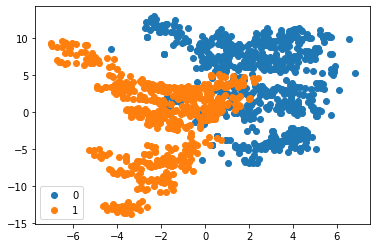

(4, 1372)
[[  3.6216    4.5459    3.866   ...  -3.7503   -3.5637   -2.5419 ]
 [  8.6661    8.1674   -2.6383  ... -13.4586   -8.3827   -0.65804]
 [ -2.8073   -2.4586    1.9242  ...  17.5932   12.393     2.6842 ]
 [ -0.44699  -1.4621    0.10645 ...  -2.7771   -1.2823    1.1952 ]]
[0 0 0 ... 1 1 1]


In [23]:
y = np.array(df['Class'])
print("y shape: ", y.shape)
X = np.array(df.iloc[:, :-1])
from matplotlib import pyplot as plt
from numpy import where
for i in range(2):
	samples_ix = where(y == i)
	plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
plt.legend()
plt.show()
# Transposing our Features for later use
X = X.T
print(X.shape)

print(X)
print(y)

# MAKING HYPERPARAMETERS CONFIGURABLE

In [18]:
# configuring hyperparameters

def process_input(prompt, type, list=[]):
    while True:
        if(type == 'int'):
            try:
                value = int(input(prompt))
                break
            except ValueError:
                print("Please enter only integer")
                continue
        else:
            if list:
                print(list)
                value = input(prompt).lower()
                print("value = ", value)
                if value not in list:
                    print("Please enter only one of these: {}".format(list))
                    continue
                else:
                    break
            else:
                value = input(prompt)
                break
    return value

In [19]:
# 
hidden_layer_len = process_input("Please enter number of hidden layers:", 'int')

hidden_layers = []
for i in range(int(hidden_layer_len)):
    neuron_len = process_input("Enter number of neurons in hidden layer: h{}".format(i+1), 'int')
    hidden_layers.append(neuron_len)

activation_fn_hidd = process_input("Please choose activation function for the hidden layer"+
                            "\nAvailable Activations: [sigmoid, relu, tanh]", 'string', ['sigmoid', 'relu', 'tanh'])
print("user selected: ", activation_fn_hidd)
activation_fn_hidd = activation_fn_hidd.lower()

activation_fn_output = process_input("Please choose activation function for the output layer "+
                            "\nAvailable Activations: [sigmoid, tanh]", 'string', ['sigmoid', 'tanh'])
activation_fn_output = activation_fn_output.lower()

activation_fns = [activation_fn_hidd, activation_fn_output]

epochs = process_input("Enter number of epochs:", 'int')
learning_rate = process_input("Enter learning rate:", 'float')

['sigmoid', 'relu', 'tanh']
value =  relu
user selected:  relu
['sigmoid', 'relu', 'tanh']
value =  sigmoid


# LOADING MLP Class 
This class will construct our NN, initiate hyperparameters and train our NN

w1 shape is (4, 20)
b1 shape is (20, 1)
w2 shape is (20, 8)
b2 shape is (8, 1)
w3 shape is (8, 1)
b3 shape is (1, 1)
dw1 shape is (4, 20)
db1 shape is (20, 1)
dw2 shape is (20, 8)
db2 shape is (8, 1)
dw3 shape is (8, 1)
db3 shape is (1, 1)
####################################################################################################

Cost for epoch 0 is 0.7380107960279809
Applying derivative of activation fun relu for A3
Applying derivative of activation fun relu for A2
Applying derivative of activation fun relu for A1
No. of correct predictions:  632
Accuracy for epoch 0 = 46.06%

Cost for epoch 1 is 0.688384246600675
Applying derivative of activation fun relu for A3
Applying derivative of activation fun relu for A2
Applying derivative of activation fun relu for A1
No. of correct predictions:  769
Accuracy for epoch 1 = 56.05%

Cost for epoch 2 is 0.6549248705014155
Applying derivative of activation fun relu for A3
Applying derivative of activation fun relu for A2
Applying deriv

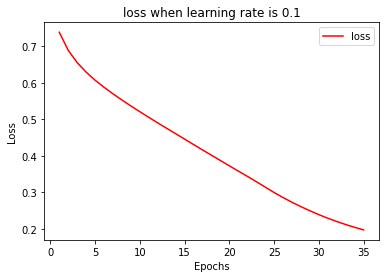

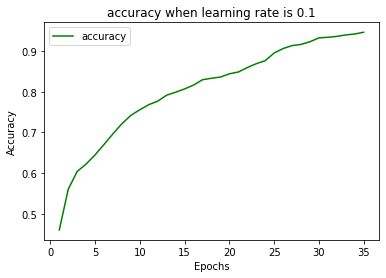

In [20]:
# training our model
from MLP import MultilayerPerceptronNW
mlp = MultilayerPerceptronNW(4, hidden_layers, 1, activation_type=activation_fns)

mlp.train_mlp(X,y,int(epochs),float(learning_rate))


# VISUALIZING OUR MLP

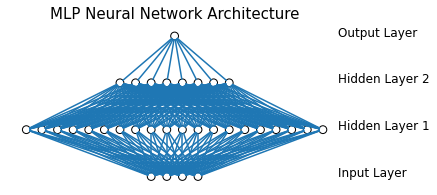

In [21]:
# Drawing our MLP Network

# visualize our neural network
from DrawNN import DrawNN
layers = [4] + hidden_layers + [1]
network = DrawNN(layers)
network.draw()
